In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers,utils,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Model
import seaborn as sns
import tensorflow as tf
import warnings 
import os
import datetime
import h5py
import csv
import math
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
warnings.filterwarnings('ignore')


In [2]:
dataframe = pd.read_csv('DATA.csv', parse_dates = ['Date'], index_col = ['Date'])

In [3]:
dataframe.shape

(628, 279)

In [4]:
dataframe.head()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,0.001637,0.000484,0.014131,-0.008907,0.004234,-0.009018,-0.003428,-0.001147,0.001152,-0.019968,...,-42.131013,-45.366858,-38.408155,-4.568686,-17.892735,-28.905355,0.839706,-9.275758,-7.583914,-36.179972
1959-08-01,0.003220,0.003382,0.015212,0.006529,0.026893,-0.007960,0.002285,0.001147,0.006879,-0.001184,...,-76.934335,-7.100969,-45.366858,-15.823874,-11.454495,-60.668068,-8.913019,-17.649155,-144.704356,-7.342417
1959-09-01,0.002126,0.002072,-0.020160,-0.018769,-0.026248,-0.001140,0.005692,0.006869,0.005698,0.009454,...,81.302522,-27.553934,-14.244207,65.385822,64.476387,5.507343,22.821607,19.756471,62.427634,-45.491488
1959-10-01,0.000271,-0.000722,-0.000353,0.001956,0.006627,-0.012652,-0.011417,-0.011470,-0.006839,-0.010645,...,-11.212218,23.410160,115.135609,26.700731,29.865259,44.292425,17.984556,9.442750,116.987545,57.519185
1959-11-01,0.000813,0.000963,0.001961,-0.006245,-0.010304,-0.003480,-0.005758,-0.005785,-0.009198,-0.038794,...,25.761488,-23.386412,-27.308385,-60.541852,-27.431153,-23.753553,-20.819566,5.029446,9.085519,-19.111381


In [5]:
dataframe.tail(10)

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.001384,0.001983,0.005470,-0.001535,0.010009,0.002074,0.002443,0.002565,0.001274,0.008683,...,-107.647096,-68.392466,-82.191596,-46.239540,-92.646085,-53.620329,-38.779922,-62.562905,-126.565960,-87.471991
2011-02-01,0.003713,0.005068,0.001869,0.011928,0.008898,0.005904,0.004371,0.006189,0.002978,0.021298,...,182.028616,110.329048,84.550156,96.568061,106.711451,110.110110,117.640488,116.987545,171.569003,104.073604
2011-03-01,-0.000305,-0.000053,-0.000399,-0.001138,0.003748,0.001631,-0.003015,-0.002586,-0.007355,-0.014927,...,24.939047,-5.412187,-15.580713,-17.040419,14.669964,16.446776,16.920149,38.960628,-21.674571,17.275056
2011-04-01,0.003544,0.003154,0.001085,0.008413,0.001709,0.008540,0.006838,0.004438,0.003779,0.019219,...,16.801824,38.495872,1.678825,-7.946252,1.678825,24.116042,7.774759,38.379655,40.121731,59.005253
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataframe.drop(dataframe.index[[622,623,624,625,626,627]], inplace = True)

In [7]:
dataframe.tail(10)

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,0.000632,0.000953,0.001858,0.011223,-0.000820,0.008205,0.003973,0.002870,0.004189,0.020977,...,16.920149,5.746220,-16.431993,4.073080,-9.880566,-22.041189,3.355305,6.462567,20.818366,17.156766
2010-08-01,-0.001158,-0.001853,-0.000565,-0.008698,-0.002509,-0.004535,-0.003197,-0.003552,-0.003496,-0.030953,...,28.342639,31.970317,17.748103,30.450368,58.776747,55.687647,44.986133,51.556439,2.517358,29.631135
2010-09-01,-0.000334,-0.000365,0.000151,-0.000372,-0.002108,0.003329,0.007350,0.007385,0.005528,0.010414,...,1.199400,-51.489001,3.714246,-0.480096,0.359946,-28.168027,-45.491488,-29.766143,-15.094539,0.359946
2010-10-01,0.002254,0.001885,-0.000786,0.008344,0.006852,0.001381,-0.001104,-0.000793,-0.000861,-0.004580,...,1.319275,-39.895913,-68.773640,-9.638606,-19.233313,-31.612770,-31.982437,-23.508780,-22.041189,-15.337601
2010-11-01,0.001138,0.003355,0.003920,0.002240,-0.001530,0.009198,0.009193,0.009218,0.010509,0.028832,...,-33.709056,-51.363747,-73.357200,53.623821,-44.743902,3.355305,-38.779922,-25.836142,-34.573298,-56.509929
2010-12-01,-0.001445,-0.000619,-0.001412,0.005688,-0.001319,0.002700,0.004600,0.005656,0.003034,0.008312,...,-84.120753,-69.409200,-58.776219,-38.160375,-46.239540,-26.817436,-51.489001,-114.228224,-104.500928,-39.895913
2011-01-01,0.001384,0.001983,0.005470,-0.001535,0.010009,0.002074,0.002443,0.002565,0.001274,0.008683,...,-107.647096,-68.392466,-82.191596,-46.239540,-92.646085,-53.620329,-38.779922,-62.562905,-126.565960,-87.471991
2011-02-01,0.003713,0.005068,0.001869,0.011928,0.008898,0.005904,0.004371,0.006189,0.002978,0.021298,...,182.028616,110.329048,84.550156,96.568061,106.711451,110.110110,117.640488,116.987545,171.569003,104.073604
2011-03-01,-0.000305,-0.000053,-0.000399,-0.001138,0.003748,0.001631,-0.003015,-0.002586,-0.007355,-0.014927,...,24.939047,-5.412187,-15.580713,-17.040419,14.669964,16.446776,16.920149,38.960628,-21.674571,17.275056


In [8]:
dataframe.shape
df = dataframe
df2 = dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 622 entries, 1959-07-01 to 2011-04-01
Columns: 279 entries, 'PI' to 'portl_7'
dtypes: float64(279)
memory usage: 1.3 MB


In [10]:
df.describe()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,...,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.002662,0.002448,0.002705,0.002302,0.002669,0.002232,0.002220,0.002303,0.001805,0.002443,...,11.550743,10.442685,11.013898,8.227152,9.072342,9.210365,9.570452,7.664479,9.252673,8.737879
std,0.005240,0.004485,0.005460,0.010075,0.012554,0.007725,0.007389,0.008033,0.008803,0.021873,...,61.859071,56.363865,89.282764,59.532413,56.069926,56.675695,59.250548,56.883668,59.657698,57.964916
min,-0.039400,-0.030118,-0.027624,-0.034175,-0.077112,-0.042128,-0.032521,-0.033746,-0.031538,-0.109873,...,-342.341937,-342.980575,-664.688536,-247.986281,-326.643002,-312.080286,-270.776018,-281.955754,-307.885293,-224.463277
25%,0.000574,0.000389,-0.000295,-0.003838,-0.002950,-0.001579,-0.001960,-0.002123,-0.002988,-0.007891,...,-20.544873,-27.553934,-31.089793,-24.059594,-24.335090,-23.998376,-24.610652,-25.468364,-23.478188,-23.202888
50%,0.002923,0.002831,0.002679,0.002317,0.002948,0.002760,0.002690,0.002741,0.001833,0.002922,...,15.499470,13.305955,15.617901,10.870613,11.821526,11.643329,11.583908,11.048975,11.346138,12.415545
75%,0.004893,0.004978,0.005840,0.008602,0.009254,0.006716,0.006672,0.006933,0.006904,0.013305,...,48.419859,47.151390,57.204579,45.419471,45.794937,44.379159,47.410960,40.672861,44.379159,45.217214
max,0.033194,0.036042,0.023816,0.035436,0.075030,0.030432,0.029043,0.031927,0.042182,0.128121,...,212.770818,196.479830,801.087515,245.193164,220.584519,214.779187,208.542271,267.772262,235.666577,239.309358


In [11]:
df.head()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,0.001637,0.000484,0.014131,-0.008907,0.004234,-0.009018,-0.003428,-0.001147,0.001152,-0.019968,...,-42.131013,-45.366858,-38.408155,-4.568686,-17.892735,-28.905355,0.839706,-9.275758,-7.583914,-36.179972
1959-08-01,0.003220,0.003382,0.015212,0.006529,0.026893,-0.007960,0.002285,0.001147,0.006879,-0.001184,...,-76.934335,-7.100969,-45.366858,-15.823874,-11.454495,-60.668068,-8.913019,-17.649155,-144.704356,-7.342417
1959-09-01,0.002126,0.002072,-0.020160,-0.018769,-0.026248,-0.001140,0.005692,0.006869,0.005698,0.009454,...,81.302522,-27.553934,-14.244207,65.385822,64.476387,5.507343,22.821607,19.756471,62.427634,-45.491488
1959-10-01,0.000271,-0.000722,-0.000353,0.001956,0.006627,-0.012652,-0.011417,-0.011470,-0.006839,-0.010645,...,-11.212218,23.410160,115.135609,26.700731,29.865259,44.292425,17.984556,9.442750,116.987545,57.519185
1959-11-01,0.000813,0.000963,0.001961,-0.006245,-0.010304,-0.003480,-0.005758,-0.005785,-0.009198,-0.038794,...,25.761488,-23.386412,-27.308385,-60.541852,-27.431153,-23.753553,-20.819566,5.029446,9.085519,-19.111381


In [12]:
def Z_Score(data):
    lenth = len(data)
    total = sum(data)
    ave = float(total)/lenth
    tempsum = sum([pow(data[i] - ave,2) for i in range(lenth)])
    tempsum = pow(float(tempsum)/lenth,0.5)
    for i in range(lenth):
        data[i] = (data[i] - ave)/tempsum
    return data

In [13]:
#columns = df2.columns.difference(['Date'])

#for col in columns:
    
    #df2[col] = Z_Score(df2[col])

#df[df.columns.difference(['Date'])] = scaler.transform(df[df.columns.difference(['Date'])])
#df2.describe()

In [14]:
columns = df.columns.difference(['Date'])

for col in columns:
    
    df[col] = Z_Score(df[col])

#df[df.columns.difference(['Date'])] = scaler.transform(df[df.columns.difference(['Date'])])
df.describe()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
count,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,...,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02
mean,1.713527e-17,-6.854110e-17,-2.456056e-16,2.655968e-16,-2.855879e-17,-1.827763e-16,1.656410e-16,2.855879e-17,1.085234e-16,1.056675e-16,...,1.142352e-17,-1.442219e-16,-8.567637e-18,3.712643e-17,2.284703e-17,-1.399381e-16,8.282050e-17,1.413660e-16,2.570291e-17,-2.056233e-16
std,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,...,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00
min,-8.033397e+00,-7.266611e+00,-5.558811e+00,-3.623641e+00,-6.359915e+00,-5.747245e+00,-4.705741e+00,-4.491466e+00,-3.790949e+00,-5.139095e+00,...,-5.725555e+00,-6.275434e+00,-7.574208e+00,-4.307227e+00,-5.992259e+00,-5.673494e+00,-4.735350e+00,-5.095546e+00,-5.320239e+00,-4.026381e+00
25%,-3.986413e-01,-4.594163e-01,-5.498891e-01,-6.099147e-01,-4.479000e-01,-4.938355e-01,-5.661627e-01,-5.514172e-01,-5.449350e-01,-4.728445e-01,...,-5.192682e-01,-6.746734e-01,-4.719565e-01,-5.427754e-01,-5.962968e-01,-5.864148e-01,-5.773552e-01,-5.829355e-01,-5.490860e-01,-5.514797e-01
50%,4.997972e-02,8.565383e-02,-4.686722e-03,1.443809e-03,2.224509e-02,6.840300e-02,6.360171e-02,5.453491e-02,3.155777e-03,2.188795e-02,...,6.388563e-02,5.084063e-02,5.160804e-02,4.443948e-02,4.907081e-02,4.296237e-02,3.400942e-02,5.954644e-02,3.511951e-02,6.349746e-02
75%,4.261449e-01,5.647414e-01,5.746337e-01,6.257951e-01,5.249631e-01,5.809178e-01,6.030547e-01,5.768633e-01,5.796698e-01,4.969855e-01,...,5.964976e-01,6.518050e-01,5.177691e-01,6.252435e-01,6.554699e-01,6.210263e-01,6.391664e-01,5.807457e-01,5.892744e-01,6.298412e-01
max,5.831442e+00,7.496021e+00,3.869386e+00,3.291498e+00,5.768465e+00,3.653574e+00,3.633194e+00,3.690883e+00,4.590505e+00,5.750474e+00,...,3.255497e+00,3.303302e+00,8.856239e+00,3.983657e+00,3.775329e+00,3.630026e+00,3.360846e+00,4.576307e+00,3.798271e+00,3.980978e+00


In [15]:
#columns = df.columns.difference(['Date'])

#for col in columns:
    #scaler = MinMaxScaler()
    #df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

#df[df.columns.difference(['Date'])] = scaler.transform(df[df.columns.difference(['Date'])])
#df.describe()

In [16]:
df.head()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,-0.195711,-0.438107,2.094278,-1.113556,0.124805,-1.457569,-0.765026,-0.429886,-0.074261,-1.025449,...,-0.868506,-0.990962,-0.553991,-0.215112,-0.481306,-0.673064,-0.147472,-0.298045,-0.282447,-0.775538
1959-08-01,0.106725,0.208578,2.292295,0.419851,1.931093,-1.320513,0.008803,-0.144028,0.576789,-0.165966,...,-1.431581,-0.311508,-0.631994,-0.404324,-0.366388,-1.233945,-0.312206,-0.445365,-2.582750,-0.277638
1959-09-01,-0.102266,-0.083787,-4.190823,-2.093207,-2.305165,-0.436888,0.470294,0.568836,0.442613,0.320786,...,1.128499,-0.674673,-0.283128,0.960900,0.988919,-0.065390,0.223826,0.212745,0.892052,-0.936308
1959-10-01,-0.456551,-0.707306,-0.560485,-0.034341,0.315525,-1.928326,-1.847156,-1.716007,-0.982834,-0.598843,...,-0.368277,0.230252,1.167140,0.310561,0.371137,0.619495,0.142123,0.031287,1.807337,0.842243
1959-11-01,-0.353084,-0.331258,-0.136302,-0.849102,-1.034120,-0.740061,-1.080608,-1.007676,-1.251001,-1.886828,...,0.229913,-0.600674,-0.429569,-1.156082,-0.651559,-0.582092,-0.513320,-0.046360,-0.002804,-0.480837


In [17]:
X = df

In [18]:
Y = df

In [19]:
X.shape

(622, 279)

In [20]:
Y.shape

(622, 279)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False, random_state = 666)

In [22]:
X_train.shape

(435, 279)

In [23]:
Y_train.shape

(435, 279)

In [24]:
X_train.head()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,-0.195711,-0.438107,2.094278,-1.113556,0.124805,-1.457569,-0.765026,-0.429886,-0.074261,-1.025449,...,-0.868506,-0.990962,-0.553991,-0.215112,-0.481306,-0.673064,-0.147472,-0.298045,-0.282447,-0.775538
1959-08-01,0.106725,0.208578,2.292295,0.419851,1.931093,-1.320513,0.008803,-0.144028,0.576789,-0.165966,...,-1.431581,-0.311508,-0.631994,-0.404324,-0.366388,-1.233945,-0.312206,-0.445365,-2.582750,-0.277638
1959-09-01,-0.102266,-0.083787,-4.190823,-2.093207,-2.305165,-0.436888,0.470294,0.568836,0.442613,0.320786,...,1.128499,-0.674673,-0.283128,0.960900,0.988919,-0.065390,0.223826,0.212745,0.892052,-0.936308
1959-10-01,-0.456551,-0.707306,-0.560485,-0.034341,0.315525,-1.928326,-1.847156,-1.716007,-0.982834,-0.598843,...,-0.368277,0.230252,1.167140,0.310561,0.371137,0.619495,0.142123,0.031287,1.807337,0.842243
1959-11-01,-0.353084,-0.331258,-0.136302,-0.849102,-1.034120,-0.740061,-1.080608,-1.007676,-1.251001,-1.886828,...,0.229913,-0.600674,-0.429569,-1.156082,-0.651559,-0.582092,-0.513320,-0.046360,-0.002804,-0.480837


In [25]:
seq_len = 10

In [26]:
def create_dataset(x, y, seq_len ):
    features = []
    targets = []
    start = 0
    end = x.shape[0] - seq_len
    for i in range(start, end, 1):
        features.append(x.iloc[i:i + seq_len])
        targets.append(y.iloc[i:i + seq_len])
    return np.array(features), np.array(targets)

In [27]:
train_dataset, train_labels = create_dataset(X_train, Y_train, seq_len)
X_dataset,Y_dataset = create_dataset(X, Y, seq_len)

In [28]:
train_dataset.shape

(425, 10, 279)

In [29]:
train_labels.shape

(425, 10, 279)

In [30]:
test_dataset, test_labels = create_dataset(X_test, Y_test, seq_len )

In [31]:
test_dataset.shape

(177, 10, 279)

In [32]:
test_labels.shape

(177, 10, 279)

In [33]:
def create_batch_dataset(x, y, train = True, buffer_size = 2000, batch_size = 500):
    batch_data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    if train:
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else:
        return batch_data.batch(batch_size)

In [34]:
train_batch_dataset = create_batch_dataset(train_dataset, train_labels)

In [35]:
test_batch_dataset = create_batch_dataset(test_dataset, test_labels)

In [36]:
model = Sequential()
model.add(LSTM(220, activation='tanh', batch_input_shape=(None,seq_len,279), return_sequences=True))
#model.add(Dropout(rate=0.4))
#model.add(LSTM(200, activation='tanh', return_sequences=True))
model.add(LSTM(180, activation='tanh', return_sequences=True))
model.add(LSTM(80, activation='tanh', recurrent_regularizer=tf.keras.regularizers.l2(l=0.003),kernel_regularizer=tf.keras.regularizers.l2(l=0.003),bias_regularizer=tf.keras.regularizers.l2(l=0.0002), return_sequences=True))
model.add(LSTM(12, activation='tanh', return_sequences=False))
model.add(RepeatVector(seq_len))
#model.add(LSTM(12, activation='relu', return_sequences=True))
#model.add(LSTM(75, activation='relu', return_sequences=True))
#model.add(LSTM(150, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(279)))

model.compile(optimizer='adam', loss='mse')
model.optimizer.lr.assign(0.002)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 220)           440000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 180)           288720    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 80)            83520     
_________________________________________________________________
lstm_3 (LSTM)                (None, 12)                4464      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 12)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 279)           3627      
Total params: 820,331
Trainable params: 820,331
Non-trainable params: 0
__________________________________________________

In [37]:
checkpoint_file = "best_model.hdf5"

checkpoint_callback = ModelCheckpoint(filepath = checkpoint_file,
                                     monitor = 'loss',
                                     mode = 'min',
                                     save_best_only=True,
                                     save_weights_only=False)

In [38]:
history = model.fit(train_batch_dataset,
                   epochs = 500,
                   validation_data = test_batch_dataset,
                   callbacks = [checkpoint_callback])

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 1.8929 - val_loss: 2.0392
Epoch 2/500
1/1 [==============================] - 0s 152ms/step - loss: 1.8402 - val_loss: 1.9903
Epoch 3/500
1/1 [==============================] - 0s 146ms/step - loss: 1.7901 - val_loss: 1.9434
Epoch 4/500
1/1 [==============================] - 0s 147ms/step - loss: 1.7422 - val_loss: 1.8984
Epoch 5/500
1/1 [==============================] - 0s 148ms/step - loss: 1.6962 - val_loss: 1.8553
Epoch 6/500
1/1 [==============================] - 0s 147ms/step - loss: 1.6519 - val_loss: 1.8140
Epoch 7/500
1/1 [==============================] - 0s 148ms/step - loss: 1.6094 - val_loss: 1.7744
Epoch 8/500
1/1 [==============================] - 0s 172ms/step - loss: 1.5686 - val_loss: 1.7365
Epoch 9/500
1/1 [==============================] - 0s 147ms/step - loss: 1.5294 - val_loss: 1.7004
Epoch 10/500
1/1 [==============================] - 0s 148ms/step - loss: 1.4917 - val_loss: 1.6659
Epoch 11/500

1/1 [==============================] - 0s 149ms/step - loss: 0.8467 - val_loss: 1.1067
Epoch 84/500
1/1 [==============================] - 0s 148ms/step - loss: 0.8463 - val_loss: 1.1085
Epoch 85/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8457 - val_loss: 1.1081
Epoch 86/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8451 - val_loss: 1.1052
Epoch 87/500
1/1 [==============================] - 0s 152ms/step - loss: 0.8446 - val_loss: 1.1046
Epoch 88/500
1/1 [==============================] - 0s 165ms/step - loss: 0.8440 - val_loss: 1.1067
Epoch 89/500
1/1 [==============================] - 0s 145ms/step - loss: 0.8437 - val_loss: 1.1068
Epoch 90/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8430 - val_loss: 1.1053
Epoch 91/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8428 - val_loss: 1.1055
Epoch 92/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8421 - val_loss: 1.1059
Epoch 93/500


1/1 [==============================] - 0s 161ms/step - loss: 0.8247 - val_loss: 1.0960
Epoch 165/500
1/1 [==============================] - 0s 154ms/step - loss: 0.8246 - val_loss: 1.0962
Epoch 166/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8244 - val_loss: 1.0957
Epoch 167/500
1/1 [==============================] - 0s 153ms/step - loss: 0.8248 - val_loss: 1.0982
Epoch 168/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8262 - val_loss: 1.0977
Epoch 169/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8295 - val_loss: 1.1017
Epoch 170/500
1/1 [==============================] - 0s 157ms/step - loss: 0.8280 - val_loss: 1.0958
Epoch 171/500
1/1 [==============================] - 0s 148ms/step - loss: 0.8247 - val_loss: 1.0958
Epoch 172/500
1/1 [==============================] - 0s 149ms/step - loss: 0.8261 - val_loss: 1.0974
Epoch 173/500
1/1 [==============================] - 0s 148ms/step - loss: 0.8247 - val_loss: 1.0978
Epoc

1/1 [==============================] - 0s 156ms/step - loss: 0.8143 - val_loss: 1.0881
Epoch 246/500
1/1 [==============================] - 0s 170ms/step - loss: 0.8142 - val_loss: 1.0882
Epoch 247/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8142 - val_loss: 1.0886
Epoch 248/500
1/1 [==============================] - 0s 152ms/step - loss: 0.8146 - val_loss: 1.0903
Epoch 249/500
1/1 [==============================] - 0s 156ms/step - loss: 0.8177 - val_loss: 1.0972
Epoch 250/500
1/1 [==============================] - 0s 148ms/step - loss: 0.8261 - val_loss: 1.0883
Epoch 251/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8206 - val_loss: 1.0875
Epoch 252/500
1/1 [==============================] - 0s 163ms/step - loss: 0.8189 - val_loss: 1.0879
Epoch 253/500
1/1 [==============================] - 0s 149ms/step - loss: 0.8180 - val_loss: 1.0868
Epoch 254/500
1/1 [==============================] - 0s 148ms/step - loss: 0.8180 - val_loss: 1.0883
Epoc

1/1 [==============================] - 0s 152ms/step - loss: 0.8088 - val_loss: 1.0865
Epoch 327/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8088 - val_loss: 1.0866
Epoch 328/500
1/1 [==============================] - 0s 152ms/step - loss: 0.8087 - val_loss: 1.0876
Epoch 329/500
1/1 [==============================] - 0s 165ms/step - loss: 0.8086 - val_loss: 1.0879
Epoch 330/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8086 - val_loss: 1.0874
Epoch 331/500
1/1 [==============================] - 0s 152ms/step - loss: 0.8085 - val_loss: 1.0869
Epoch 332/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8084 - val_loss: 1.0878
Epoch 333/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8084 - val_loss: 1.0874
Epoch 334/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8083 - val_loss: 1.0878
Epoch 335/500
1/1 [==============================] - 0s 164ms/step - loss: 0.8083 - val_loss: 1.0867
Epoc

1/1 [==============================] - 0s 149ms/step - loss: 0.8062 - val_loss: 1.0853
Epoch 408/500
1/1 [==============================] - 0s 153ms/step - loss: 0.8062 - val_loss: 1.0839
Epoch 409/500
1/1 [==============================] - 0s 147ms/step - loss: 0.8060 - val_loss: 1.0834
Epoch 410/500
1/1 [==============================] - 0s 148ms/step - loss: 0.8059 - val_loss: 1.0840
Epoch 411/500
1/1 [==============================] - 0s 149ms/step - loss: 0.8059 - val_loss: 1.0847
Epoch 412/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8058 - val_loss: 1.0845
Epoch 413/500
1/1 [==============================] - 0s 152ms/step - loss: 0.8057 - val_loss: 1.0840
Epoch 414/500
1/1 [==============================] - 0s 163ms/step - loss: 0.8057 - val_loss: 1.0841
Epoch 415/500
1/1 [==============================] - 0s 149ms/step - loss: 0.8055 - val_loss: 1.0845
Epoch 416/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8055 - val_loss: 1.0842
Epoc

1/1 [==============================] - 0s 153ms/step - loss: 0.8035 - val_loss: 1.0806
Epoch 489/500
1/1 [==============================] - 0s 156ms/step - loss: 0.8035 - val_loss: 1.0807
Epoch 490/500
1/1 [==============================] - 0s 153ms/step - loss: 0.8034 - val_loss: 1.0803
Epoch 491/500
1/1 [==============================] - 0s 151ms/step - loss: 0.8034 - val_loss: 1.0802
Epoch 492/500
1/1 [==============================] - 0s 164ms/step - loss: 0.8034 - val_loss: 1.0805
Epoch 493/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8033 - val_loss: 1.0804
Epoch 494/500
1/1 [==============================] - 0s 154ms/step - loss: 0.8033 - val_loss: 1.0806
Epoch 495/500
1/1 [==============================] - 0s 154ms/step - loss: 0.8033 - val_loss: 1.0804
Epoch 496/500
1/1 [==============================] - 0s 155ms/step - loss: 0.8032 - val_loss: 1.0805
Epoch 497/500
1/1 [==============================] - 0s 164ms/step - loss: 0.8032 - val_loss: 1.0803
Epoc

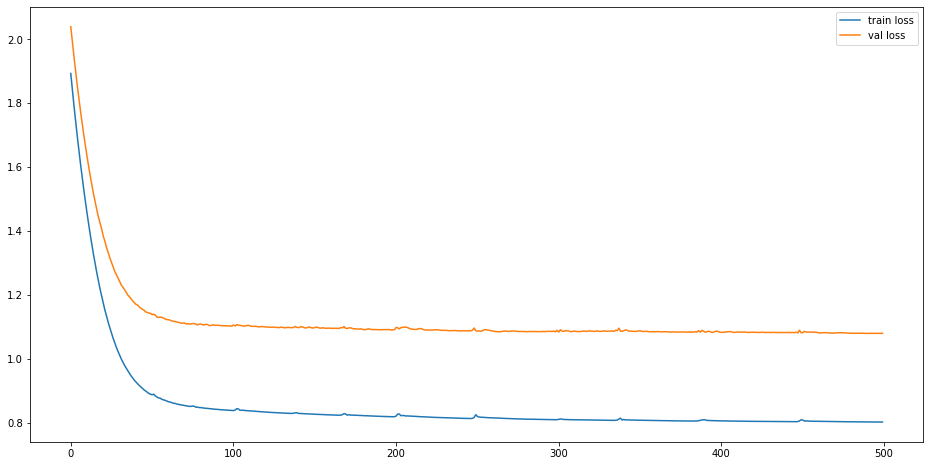

In [39]:
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend(loc = 'best')
plt.show()

In [40]:
code_layer_model = Model(inputs = model.input, outputs = model.get_layer('repeat_vector').output)

In [41]:
fcode1 = code_layer_model.predict(X_dataset)

In [42]:
X_dataset.shape

(612, 10, 279)

In [43]:
fcode1.shape

(612, 10, 12)

In [44]:
fcode = fcode1[:,0,:]

In [45]:
fcode.shape

(612, 12)

In [46]:
fcode2 = fcode1[611,:,:]

In [47]:
fcode2.shape

(10, 12)

In [48]:
fcode = np.row_stack((fcode,fcode2))

In [49]:
fcode.shape

(622, 12)

In [50]:
df2 = np.power(df2, 2)

In [51]:
columns = df2.columns.difference(['Date'])

for col in columns:
    
    df2[col] = Z_Score(df2[col])

df2.describe()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
count,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,...,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02
mean,3.427055e-17,4.569407e-17,6.054464e-16,7.996462e-17,-1.070955e-16,-3.084349e-16,-4.340936e-16,-1.256587e-16,-3.541290e-16,5.940229e-16,...,3.998231e-17,-1.499337e-16,9.709989e-17,1.199469e-16,-4.483730e-16,-2.627409e-16,2.056233e-16,-7.425286e-17,3.655525e-16,-3.998231e-16
std,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,...,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00
min,-2.409723e-01,-2.866372e-01,-4.569243e-01,-5.848847e-01,-3.655062e-01,-4.069295e-01,-4.968044e-01,-5.049861e-01,-5.231299e-01,-3.515409e-01,...,-4.638184e-01,-4.654698e-01,-2.362098e-01,-5.449295e-01,-4.758113e-01,-4.761675e-01,-4.978433e-01,-4.858879e-01,-4.790905e-01,-5.297576e-01
25%,-2.317570e-01,-2.663131e-01,-4.279015e-01,-5.389810e-01,-3.430249e-01,-3.791507e-01,-4.617590e-01,-4.633817e-01,-4.851554e-01,-3.343259e-01,...,-4.340237e-01,-4.310320e-01,-2.213460e-01,-4.991997e-01,-4.288948e-01,-4.422912e-01,-4.637796e-01,-4.503608e-01,-4.408432e-01,-4.857110e-01
50%,-2.003338e-01,-2.070792e-01,-3.137718e-01,-3.589113e-01,-2.722614e-01,-2.897123e-01,-3.211891e-01,-3.405995e-01,-3.609808e-01,-2.683369e-01,...,-3.176467e-01,-2.598719e-01,-1.765955e-01,-3.629332e-01,-2.897837e-01,-3.001177e-01,-3.150074e-01,-3.207765e-01,-3.222069e-01,-3.436479e-01
75%,-1.038627e-01,-4.733799e-02,3.124726e-03,1.041792e-01,-3.923236e-02,-1.999895e-02,7.300148e-03,8.921557e-03,1.044260e-02,-7.152356e-02,...,1.722487e-02,4.144351e-02,-4.726659e-02,5.749990e-02,3.085841e-02,7.470146e-02,5.507458e-02,1.999129e-02,4.155409e-02,2.009263e-02
max,1.531029e+01,1.581962e+01,1.366221e+01,7.095106e+00,1.441868e+01,1.303489e+01,1.050450e+01,9.682286e+00,1.050085e+01,1.127324e+01,...,1.474135e+01,1.786524e+01,1.829047e+01,9.564741e+00,1.660932e+01,1.485097e+01,1.066557e+01,1.212999e+01,1.308156e+01,8.058538e+00


In [52]:
X2 = df2
Y2 = df2

In [53]:
X2.shape

(622, 279)

In [54]:
Y2.shape

(622, 279)

In [55]:
gX = X2
gY = Y2

In [56]:
gX.shape

(622, 279)

In [57]:
gY.shape

(622, 279)

In [58]:
gX_train, gX_test, gY_train, gY_test = train_test_split(gX, gY, test_size = 0.3, shuffle = False, random_state = 666)

In [59]:
gtrain_dataset, gtrain_labels = create_dataset(gX_train, gY_train, seq_len)

In [60]:
gtest_dataset, gtest_labels = create_dataset(gX_test, gY_test, seq_len )

In [61]:
gtrain_batch_dataset = create_batch_dataset(gtrain_dataset, gtrain_labels)

In [62]:
gtest_batch_dataset = create_batch_dataset(gtest_dataset, gtest_labels)

In [63]:
gmodel = Sequential()
gmodel.add(LSTM(180, activation='tanh', batch_input_shape=(None,seq_len,279), return_sequences=True))
gmodel.add(Dropout(rate=0.2))
#gmodel.add(LSTM(220, activation='tanh', return_sequences=True))
#gmodel.add(LSTM(150, activation='tanh', return_sequences=True))
gmodel.add(LSTM(80, activation='tanh',recurrent_regularizer=tf.keras.regularizers.l2(l=0.003),kernel_regularizer=tf.keras.regularizers.l2(l=0.003),bias_regularizer=tf.keras.regularizers.l2(l=0.0002), return_sequences=True))
gmodel.add(LSTM(12, activation='tanh', return_sequences=False))
gmodel.add(RepeatVector(seq_len))

gmodel.add(TimeDistributed(Dense(279)))

gmodel.compile(optimizer='adam', loss='mse')
gmodel.optimizer.lr.assign(0.002)

gmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 180)           331200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 180)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 80)            83520     
_________________________________________________________________
lstm_6 (LSTM)                (None, 12)                4464      
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 12)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 279)           3627      
Total params: 422,811
Trainable params: 422,811
Non-trainable params: 0
________________________________________________

In [64]:
gcheckpoint_file = "best_gmodel.hdf5"

gcheckpoint_callback = ModelCheckpoint(filepath = gcheckpoint_file,
                                     monitor = 'loss',
                                     mode = 'min',
                                     save_best_only=True,
                                     save_weights_only=False)

In [65]:
ghistory = gmodel.fit(gtrain_batch_dataset,
                   epochs = 500,
                   validation_data = gtest_batch_dataset,
                   callbacks = [gcheckpoint_callback])

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 1.8419 - val_loss: 2.1657
Epoch 2/500
1/1 [==============================] - 0s 99ms/step - loss: 1.7888 - val_loss: 2.1166
Epoch 3/500
1/1 [==============================] - 0s 99ms/step - loss: 1.7385 - val_loss: 2.0691
Epoch 4/500
1/1 [==============================] - 0s 98ms/step - loss: 1.6904 - val_loss: 2.0233
Epoch 5/500
1/1 [==============================] - 0s 105ms/step - loss: 1.6441 - val_loss: 1.9793
Epoch 6/500
1/1 [==============================] - 0s 99ms/step - loss: 1.5997 - val_loss: 1.9371
Epoch 7/500
1/1 [==============================] - 0s 98ms/step - loss: 1.5570 - val_loss: 1.8966
Epoch 8/500
1/1 [==============================] - 0s 99ms/step - loss: 1.5161 - val_loss: 1.8578
Epoch 9/500
1/1 [==============================] - 0s 99ms/step - loss: 1.4768 - val_loss: 1.8206
Epoch 10/500
1/1 [==============================] - 0s 98ms/step - loss: 1.4393 - val_loss: 1.7852
Epoch 11/500
1/1 [==

1/1 [==============================] - 0s 98ms/step - loss: 0.8096 - val_loss: 1.2517
Epoch 84/500
1/1 [==============================] - 0s 97ms/step - loss: 0.8090 - val_loss: 1.2516
Epoch 85/500
1/1 [==============================] - 0s 98ms/step - loss: 0.8082 - val_loss: 1.2511
Epoch 86/500
1/1 [==============================] - 0s 99ms/step - loss: 0.8076 - val_loss: 1.2528
Epoch 87/500
1/1 [==============================] - 0s 99ms/step - loss: 0.8070 - val_loss: 1.2539
Epoch 88/500
1/1 [==============================] - 0s 116ms/step - loss: 0.8063 - val_loss: 1.2523
Epoch 89/500
1/1 [==============================] - 0s 96ms/step - loss: 0.8058 - val_loss: 1.2533
Epoch 90/500
1/1 [==============================] - 0s 99ms/step - loss: 0.8052 - val_loss: 1.2540
Epoch 91/500
1/1 [==============================] - 0s 101ms/step - loss: 0.8047 - val_loss: 1.2521
Epoch 92/500
1/1 [==============================] - 0s 98ms/step - loss: 0.8043 - val_loss: 1.2520
Epoch 93/500
1/1 [===

1/1 [==============================] - 0s 114ms/step - loss: 0.7802 - val_loss: 1.2395
Epoch 166/500
1/1 [==============================] - 0s 96ms/step - loss: 0.7798 - val_loss: 1.2391
Epoch 167/500
1/1 [==============================] - 0s 97ms/step - loss: 0.7796 - val_loss: 1.2395
Epoch 168/500
1/1 [==============================] - 0s 97ms/step - loss: 0.7793 - val_loss: 1.2407
Epoch 169/500
1/1 [==============================] - 0s 97ms/step - loss: 0.7791 - val_loss: 1.2413
Epoch 170/500
1/1 [==============================] - 0s 98ms/step - loss: 0.7788 - val_loss: 1.2415
Epoch 171/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7786 - val_loss: 1.2422
Epoch 172/500
1/1 [==============================] - 0s 96ms/step - loss: 0.7784 - val_loss: 1.2428
Epoch 173/500
1/1 [==============================] - 0s 97ms/step - loss: 0.7781 - val_loss: 1.2429
Epoch 174/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7780 - val_loss: 1.2433
Epoch 175/500

1/1 [==============================] - 0s 98ms/step - loss: 0.7677 - val_loss: 1.2532
Epoch 247/500
1/1 [==============================] - 0s 97ms/step - loss: 0.7675 - val_loss: 1.2526
Epoch 248/500
1/1 [==============================] - 0s 98ms/step - loss: 0.7674 - val_loss: 1.2535
Epoch 249/500
1/1 [==============================] - 0s 109ms/step - loss: 0.7674 - val_loss: 1.2537
Epoch 250/500
1/1 [==============================] - 0s 96ms/step - loss: 0.7671 - val_loss: 1.2536
Epoch 251/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7670 - val_loss: 1.2531
Epoch 252/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7669 - val_loss: 1.2531
Epoch 253/500
1/1 [==============================] - 0s 100ms/step - loss: 0.7667 - val_loss: 1.2532
Epoch 254/500
1/1 [==============================] - 0s 98ms/step - loss: 0.7666 - val_loss: 1.2533
Epoch 255/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7664 - val_loss: 1.2538
Epoch 256/50

Epoch 328/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7607 - val_loss: 1.2574
Epoch 329/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7607 - val_loss: 1.2552
Epoch 330/500
1/1 [==============================] - 0s 115ms/step - loss: 0.7607 - val_loss: 1.2571
Epoch 331/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7606 - val_loss: 1.2577
Epoch 332/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7604 - val_loss: 1.2556
Epoch 333/500
1/1 [==============================] - 0s 100ms/step - loss: 0.7606 - val_loss: 1.2561
Epoch 334/500
1/1 [==============================] - 0s 98ms/step - loss: 0.7607 - val_loss: 1.2574
Epoch 335/500
1/1 [==============================] - 0s 100ms/step - loss: 0.7604 - val_loss: 1.2570
Epoch 336/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7602 - val_loss: 1.2560
Epoch 337/500
1/1 [==============================] - 0s 101ms/step - loss: 0.7605 - val_loss: 1.2

1/1 [==============================] - 0s 119ms/step - loss: 0.7574 - val_loss: 1.2604
Epoch 410/500
1/1 [==============================] - 0s 100ms/step - loss: 0.7573 - val_loss: 1.2610
Epoch 411/500
1/1 [==============================] - 0s 101ms/step - loss: 0.7576 - val_loss: 1.2583
Epoch 412/500
1/1 [==============================] - 0s 100ms/step - loss: 0.7576 - val_loss: 1.2589
Epoch 413/500
1/1 [==============================] - 0s 101ms/step - loss: 0.7572 - val_loss: 1.2610
Epoch 414/500
1/1 [==============================] - 0s 102ms/step - loss: 0.7575 - val_loss: 1.2583
Epoch 415/500
1/1 [==============================] - 0s 103ms/step - loss: 0.7574 - val_loss: 1.2587
Epoch 416/500
1/1 [==============================] - 0s 101ms/step - loss: 0.7574 - val_loss: 1.2601
Epoch 417/500
1/1 [==============================] - 0s 101ms/step - loss: 0.7572 - val_loss: 1.2591
Epoch 418/500
1/1 [==============================] - 0s 115ms/step - loss: 0.7573 - val_loss: 1.2611
Epoc

1/1 [==============================] - 0s 101ms/step - loss: 0.7554 - val_loss: 1.2611
Epoch 491/500
1/1 [==============================] - 0s 102ms/step - loss: 0.7555 - val_loss: 1.2613
Epoch 492/500
1/1 [==============================] - 0s 102ms/step - loss: 0.7554 - val_loss: 1.2622
Epoch 493/500
1/1 [==============================] - 0s 102ms/step - loss: 0.7554 - val_loss: 1.2614
Epoch 494/500
1/1 [==============================] - 0s 99ms/step - loss: 0.7554 - val_loss: 1.2615
Epoch 495/500
1/1 [==============================] - 0s 104ms/step - loss: 0.7553 - val_loss: 1.2624
Epoch 496/500
1/1 [==============================] - 0s 103ms/step - loss: 0.7554 - val_loss: 1.2618
Epoch 497/500
1/1 [==============================] - 0s 118ms/step - loss: 0.7554 - val_loss: 1.2610
Epoch 498/500
1/1 [==============================] - 0s 101ms/step - loss: 0.7554 - val_loss: 1.2617
Epoch 499/500
1/1 [==============================] - 0s 100ms/step - loss: 0.7553 - val_loss: 1.2618
Epoch

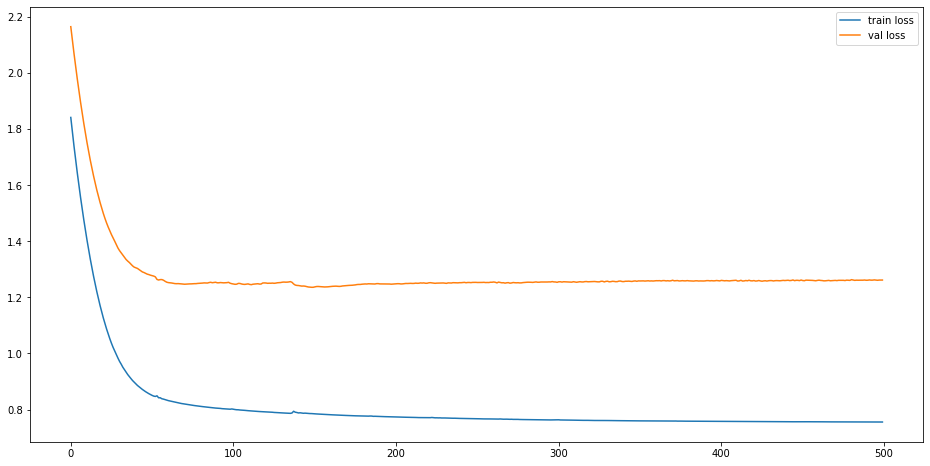

In [66]:
plt.figure(figsize = (16,8))
plt.plot(ghistory.history['loss'], label = 'train loss')
plt.plot(ghistory.history['val_loss'], label = 'val loss')
plt.legend(loc = 'best')
plt.show()

In [67]:
gX_dataset,gY_dataset = create_dataset(gX, gY, seq_len)

In [68]:
gcode_layer_model = Model(inputs = gmodel.input, outputs = gmodel.get_layer('repeat_vector_1').output)

In [69]:
gcode1 = gcode_layer_model.predict(gX_dataset)

In [70]:
gcode = gcode1[:,0,:]

In [71]:
gcode2 = gcode1[611,:,:]

In [72]:
gcode = np.row_stack((gcode,gcode2))

In [73]:
gcode.shape

(622, 12)

In [74]:
f2 = fcode[:,0]

In [75]:
f2 = np.power(f2, 2)

In [76]:
f2.shape

(622,)

In [77]:
g0 = gcode[:,0]

In [78]:
f = np.column_stack((fcode, f2, g0))

In [79]:
f.shape

(622, 14)

In [80]:
fr = f

In [81]:
save = pd.DataFrame(f)
save.to_csv('F14Approach1.csv',index=False)